# Chapter 4: Expected Utility under Uncertainty and Information Asymmetry


Managing financial risks hinges on several factors, primarily the magnitude of the financial risk and the risk tolerance of both corporations and individuals. Generally, people opt for insurance as a way to mitigate risks they are unwilling to take on, demonstrating risk aversion. Another crucial aspect related to risk is uncertainty, often referred to as ambiguity, leading to uncertainty aversion. Additionally, not everyone possesses the same level of information about potential future events; disparities in information can lead to information asymmetry, which gives rise to moral hazard and adverse selection.

Chapter Objectives:

1. Understand the concepts of risk and risk aversion
2. Use utility functions to quantify preferences
3. Distinguish between risk and uncertainty
4. Explore the concept of information asymmetry
5. Discuss moral hazard and adverse selection

In this chapter, we will introduce these concepts and establish some economic principles of financial risk management. We explain information asymmetry and its effects on how corporations and individuals handle financial risks. We also examine how uncertainty influences corporate decision-making. Furthermore, due to information asymmetry, we face two significant challenges in financial risk management: moral hazard and adverse selection. We will explore strategies to address these challenges.

In [1]:
import math
plan = {200000:0.5, 0:0.5}
mu=0
var=0
for payoff, p in plan.items():
    mu += p*payoff
print("The expected compensation of plan B is", round(mu,2))

for payoff, p in plan.items():
    var += p*(payoff - mu)**2
std= math.sqrt(var)
print("The standard deviation of compensation plan B is", round(std,2))


The expected compensation of plan B is 100000.0
The standard deviation of compensation plan B is 100000.0


In [2]:
import math
plana = {100000:1}
planb = {200000:0.5, 0:0.5}
ua = 0
ub = 0
for val, p in plana.items():
    ua += p*math.sqrt(val)
for val, p in planb.items():
    ub += p*math.sqrt(val)
print("The expected utility from consuming x is", round(ua,2))
print("The expected utility from consuming y is", round(ub,2))


The expected utility from consuming x is 316.23
The expected utility from consuming y is 223.61


In [3]:
import math

payoff_x = {100:0.3, 80:0.4, 50:0.3}
payoff_y = {90:0.3, 80:0.4, 60:0.3}
ux = 0
uy = 0
for val, p in payoff_x.items():
    ux += p*math.sqrt(val)
for val, p in payoff_y.items():
    uy += p*math.sqrt(val)
  
print("The expected utility from consuming x is", round(ux,2))
print("The expected utility from consuming y is", round(uy,2)) 


The expected utility from consuming x is 8.7
The expected utility from consuming y is 8.75


In [4]:
import math
x = {12000:0.5, 4000:0.5}
u = 0
ex=0
for val, p in x.items():
    u += p*math.sqrt(val)
    ex += p*val
ce=u**2
premium = ex - ce
print("The certainty equivalent is", round(u,2))
print("The risk premium is", round(premium,2))


The certainty equivalent is 86.4
The risk premium is 535.9


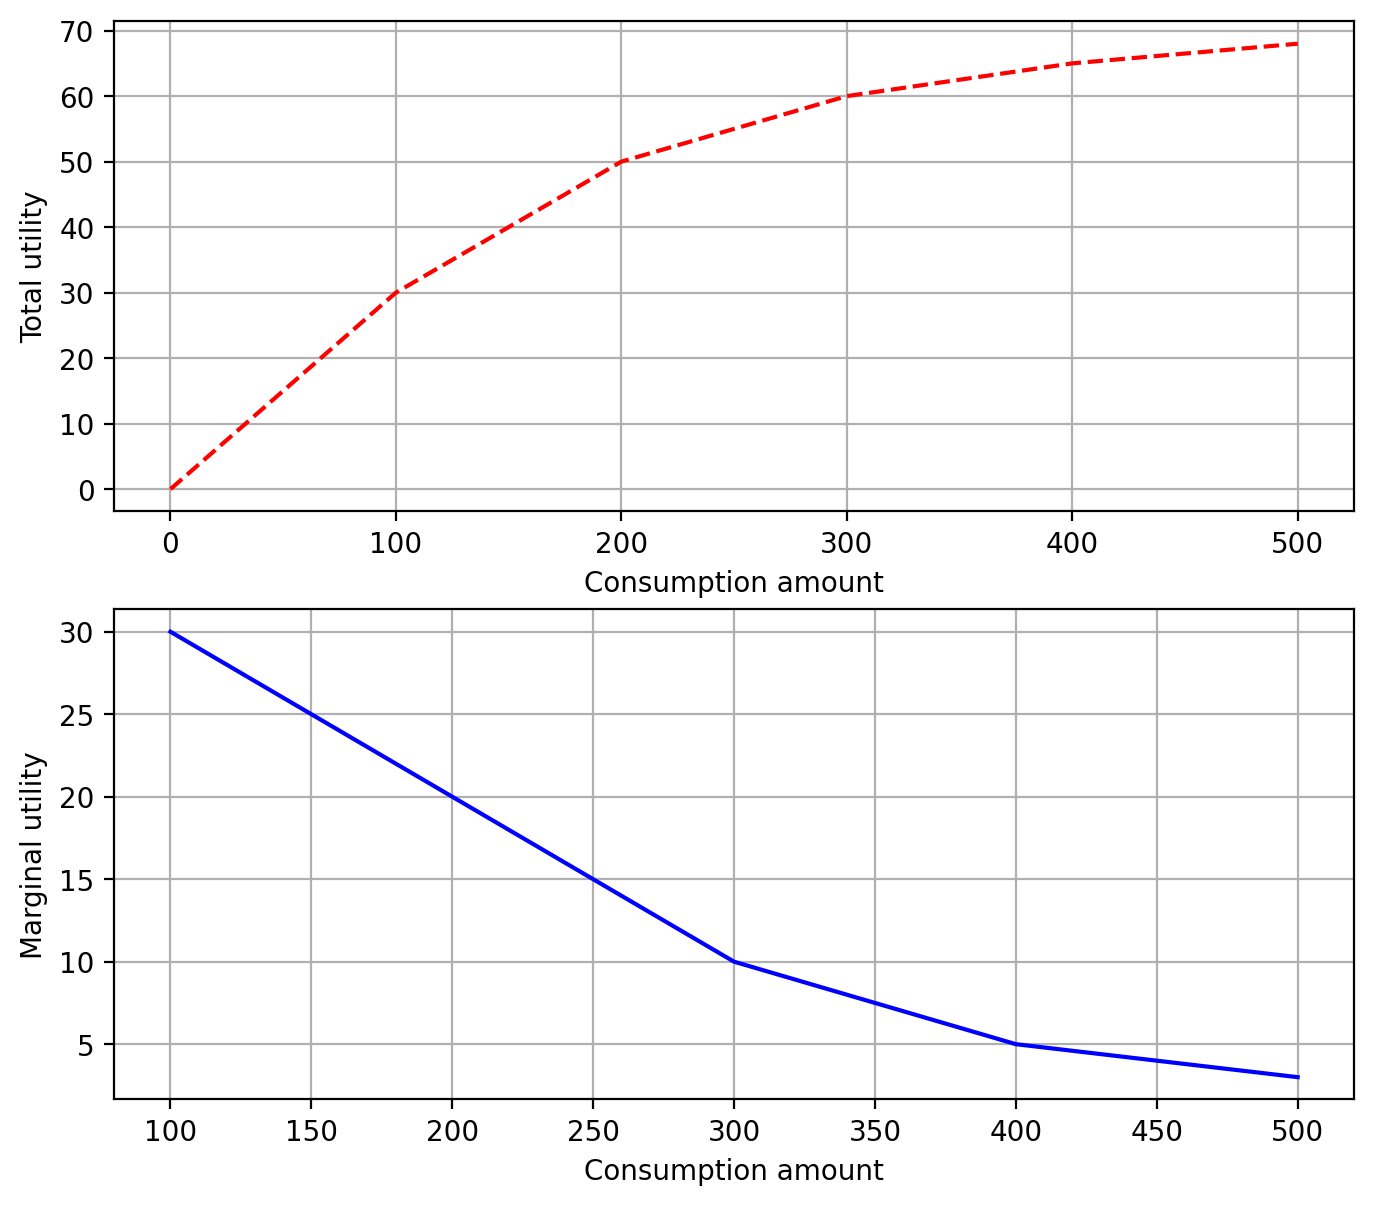

In [5]:

import matplotlib.pyplot as plt
x1 = [0, 100, 200, 300, 400, 500]
y1 = [0, 30, 50, 60, 65, 68]
x2 = [100, 200, 300, 400, 500]
y2 = [30, 20, 10, 5, 3]
plt.figure(figsize=(8,7), dpi=200)
plt.subplot(2, 1, 1)
plt.plot(x1, y1, c="r", linestyle="--")
plt.grid(axis="x")
plt.grid(axis="y")
plt.xlabel("Consumption amount")
plt.ylabel("Total utility")
plt.subplot(2, 1, 2)
plt.plot(x2, y2, c="b", linestyle="-")
plt.grid(axis="x")
plt.grid(axis="y")
plt.xlabel("Consumption amount")
plt.ylabel("Marginal utility")
plt.show()


In [6]:
losses = [20000,10000,5000,1000,0]
ps = [0.01, 0.02, 0.05, 0.07, 0.85]
w0 = 100000
utility=0
def u(x):
    return math.sqrt(x)
for i in range(len(ps)):
    utility += ps[i]*u(w0-losses[i])
print("The expected utility without insurance is", round(utility,2))


The expected utility without insurance is 315.06


In [7]:
cost=570
deductible=1000
utility=0
for i in range(len(ps)):
    wi=w0-cost-min(deductible,losses[i])
    utility += ps[i]*u(wi)
print("The expected utility with insurance is", round(utility,2))


The expected utility with insurance is 315.09


In [8]:
# options with known risks
A=["1","3"] 
# options with unknown risks
B=["2","4"] 
# Make your choice
name = input("Enter option number (1, 2, 3, 4):")
# for i in range(len(A)):
if name == A[0] or name == A[1]:
    print ("This is the preferred option.")
else:
    print ("This is a not preferred option.")
# for the unknown options, set probability to 0.4-0.6  
import numpy as np
unknown = np.random.uniform(0.4,0.6,1)
# See if you win or not
if name==A[0]:
    # You win if you choose 1 and a red ball is drawn from A
    if np.random.rand()>0.5:
        print ("Congratulations, you have won $1!")
    else:
        print ("Good luck next time!")
elif name==B[0]:
    # You win if you choose 2 and a red ball is drawn from B  
    if np.random.rand()>unknown:
        print ("Congratulations, you have won $1!")
    else:
        print ("Good luck next time!")
elif name==A[1]:
    # You win if you choose 3 and a black ball is drawn from A    
    if np.random.rand()<=0.5:
        print ("Congratulations, you have won $1!")
    else:
        print ("Good luck next time!") 
elif name==B[1]:
    # You win if you choose 4 and a black ball is drawn from B    
    if np.random.rand()<=unknown:
        print ("Congratulations, you have won $1!")
    else:
        print ("Good luck next time!")

Enter option number (1, 2, 3, 4):3
This is the preferred option.
Good luck next time!


In [1]:
ret_stock=0.15
std_stock=0.2
ret_crypto=0.35
std_crypto_scenarios={0.35:0.5, 0.7:0.5}
rf=0.05
# calculate stock Sharpe ratio
stock_Sharpe=(ret_stock-rf)/std_stock
print(f"The stock has a Sharpe ratio of {stock_Sharpe:.3f}.")
# apply maxmin on Crypto-ETF standard deviation
std_crypto=max(std_crypto_scenarios.keys())
# calculate crypto Sharpe ratio
crypto_Sharpe=(ret_crypto-rf)/std_crypto
print(f"The Crypto-ETF has a Sharpe ratio of {crypto_Sharpe:.3f}.")
if stock_Sharpe>=crypto_Sharpe:
    print("Invest in the stock since it has a higher Sharpe ratio!")
else:
    print("Invest in the Crypto-ETF since it has a higher Sharpe ratio!")   


The stock has a Sharpe ratio of 0.500.
The Crypto-ETF has a Sharpe ratio of 0.429.
Invest in the stock since it has a higher Sharpe ratio!


In [10]:
CF_monitored_notinsured = {0.9:100, 0.1:10}
CF_notmonitored_notinsured = {0.8:100, 0.2:10}
CF_monitored_insured = {0.9:100, 0.1:100}
CF_notmonitored_insured = {0.8:100, 0.2:100}
monitoring_cost=1
# benefit from monitoring if not insured
CF_monitored=0
CF_notmonitored=0
for p, cf in CF_monitored_notinsured.items():
    CF_monitored += cf*p
for p, cf in CF_notmonitored_notinsured.items():
    CF_notmonitored += cf*p 
benefit_notinsured=CF_monitored-CF_notmonitored
print("when uninsured, benefit from monitoring is m$",benefit_notinsured)
# make a decision based on benefit-cost analysis
if benefit_notinsured>monitoring_cost:
    print("when uninsured, ABC Corp. will monitor")
else:
    print("when uninsured, ABC Corp. will not monitor")
# benefit from monitoring if insured
CF_monitored=0
CF_notmonitored=0
for p, cf in CF_monitored_insured.items():
    CF_monitored += cf*p
for p, cf in CF_notmonitored_insured.items():
    CF_notmonitored += cf*p 
benefit_insured=CF_monitored-CF_notmonitored
print("when insured, benefit from monitoring is m$",benefit_insured)
# make a decision based on benefit-cost analysis
if benefit_insured>monitoring_cost:
    print("when insured, ABC Corp. will monitor")
else:
    print("when insured, ABC Corp. will not monitor")

when uninsured, benefit from monitoring is m$ 9.0
when uninsured, ABC Corp. will monitor
when insured, benefit from monitoring is m$ 0.0
when insured, ABC Corp. will not monitor


In [11]:
import math
car = {10000:0.5, 5000:0.5}
prc = 0
for val, p in car.items():
    prc += p*val
print("The price of used cars is", prc)



The price of used cars is 7500.0


In [12]:
# obtain car values and probabilities
car_val=list(car.keys())
car_p=list(car.values())
# take into account adverse selection
for i in range(len(car_val)):
    if car_val[i] > prc:
        car_p[i] = 0
# probabilities of market transaction
print(car_p)
# adjust the probabilities of transaction      
for i in range(len(car_val)):
    car_p[i] = car_p[i]/(car_p[0]+car_p[1])
# calculate market price
market_prc = 0
for i in range(len(car_val)):
    market_prc = car_p[i]*car_val[i]
print("the market price of the used car is", market_prc)


[0, 0.5]
the market price of the used car is 5000.0
